In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/integrated18.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/Labels18.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (12771, 2000)
shape of labels: (12771, 3)


In [3]:
Y = Y['cluster']
print("shape of labels now: ", Y.shape)

shape of labels now:  (12771,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(12771, 92)
shape of train set:  (10216, 2000)  and labels:  (10216, 92) 

shape of test set:  (2555, 2000)  and labels:  (2555, 92) 

Shape of train and validation set to check for overfitting
shape of train set:  (9194, 2000)  and labels:  (9194, 92) 

shape of validation set:  (1022, 2000)  and labels:  (1022, 92)


### Linear SVM performance

shape of labels in training set:  (10216,)
shape of labels in test set:  (2555,)
Training time: 16.77684783935547
Predict time: 0.03973507881164551
Accuracy of test set:  0.9260273972602739
F1-score of test set:  0.923719561397397
Precision of test set: 0.9247144643314675
Recall of test set: 0.9260273972602739
Classification report of test set:
                             precision    recall  f1-score   support

                Astro Aqp4       1.00      1.00      1.00         2
      L2/3 IT VISp Adamts2       0.95      0.90      0.92        41
        L2/3 IT VISp Agmat       0.96      0.98      0.97       132
         L2/3 IT VISp Rrad       0.95      0.86      0.90        21
          L4 IT VISp Rspo1       0.99      1.00      0.99       270
          L5 IT VISp Batf3       0.93      0.99      0.96        80
        L5 IT VISp Col27a1       0.96      0.96      0.96        23
   L5 IT VISp Col6a1 Fezf2       0.86      0.67      0.75         9
  L5 IT VISp Hsd11b1 Endou       0.90  

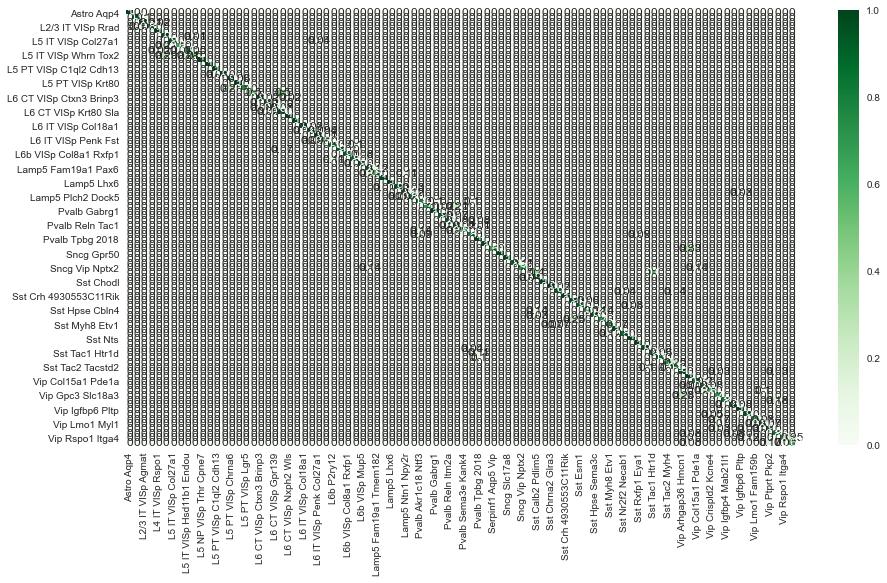

In [5]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)
start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start

print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## ANN performance

Train the model to check for overfitting


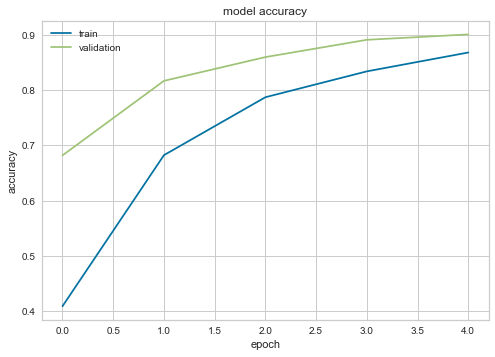

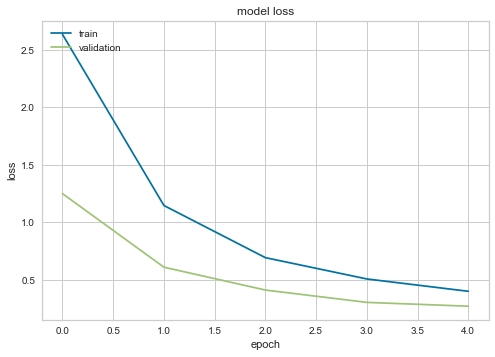

train the final model
Epoch 1/5
320/320 [==============================] - 3s 9ms/step - loss: 0.3376 - accuracy: 0.8889
Epoch 2/5
320/320 [==============================] - 3s 9ms/step - loss: 0.2989 - accuracy: 0.8964
Epoch 3/5
320/320 [==============================] - 4s 12ms/step - loss: 0.2625 - accuracy: 0.9122
Epoch 4/5
320/320 [==============================] - 5s 16ms/step - loss: 0.2451 - accuracy: 0.9145
Epoch 5/5
320/320 [==============================] - 5s 16ms/step - loss: 0.2235 - accuracy: 0.9233
Training time: 19.959439992904663
Predict time: 0.39992499351501465
The results are as follows:
Accuracy of test set:  0.9315068493150684
F1-score of test set:  0.9297270737424712
Precision of test set: 0.9352822867257683
Recall of test set: 0.9315068493150684
Classification report of test set:
                             precision    recall  f1-score   support

                Astro Aqp4       1.00      1.00      1.00         2
      L2/3 IT VISp Adamts2       0.95      0.9

/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


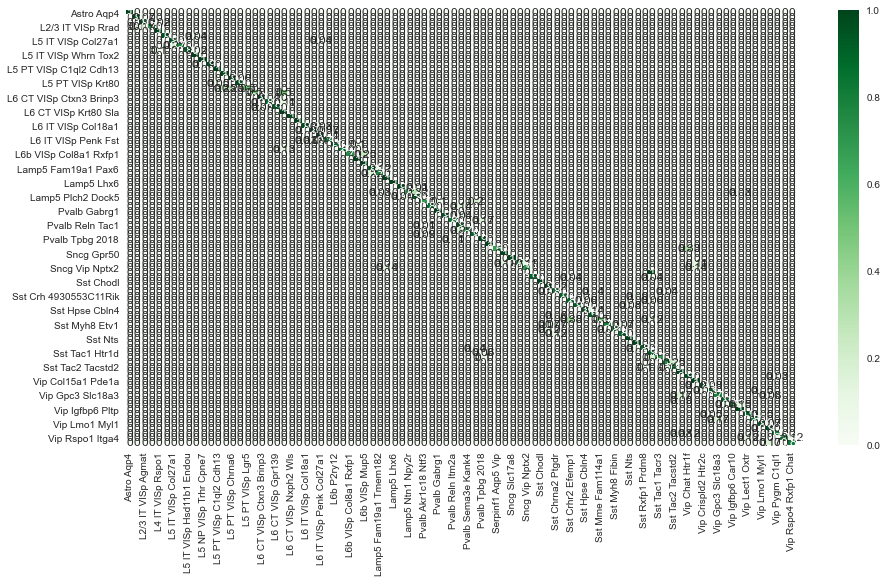

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


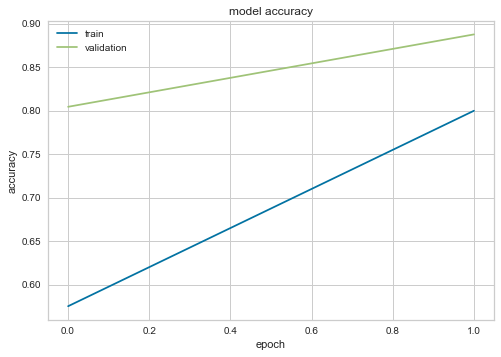

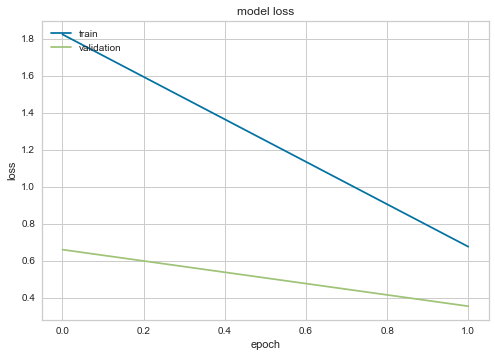

train the final model
Epoch 1/2
320/320 [==============================] - 61s 191ms/step - loss: 0.4161 - accuracy: 0.8690
Epoch 2/2
320/320 [==============================] - 51s 161ms/step - loss: 0.3251 - accuracy: 0.8917
Training time: 112.81448483467102
Predict time: 3.921566963195801
The results are as follows:
Accuracy of test set:  0.9252446183953034
F1-score of test set:  0.921465962941509
Precision of test set: 0.9312457820735365
Recall of test set: 0.9252446183953034


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of test set:
                             precision    recall  f1-score   support

                Astro Aqp4       1.00      1.00      1.00         2
      L2/3 IT VISp Adamts2       1.00      0.90      0.95        41
        L2/3 IT VISp Agmat       0.97      0.98      0.97       132
         L2/3 IT VISp Rrad       0.91      0.95      0.93        21
          L4 IT VISp Rspo1       0.99      1.00      0.99       270
          L5 IT VISp Batf3       0.96      0.96      0.96        80
        L5 IT VISp Col27a1       0.88      0.96      0.92        23
   L5 IT VISp Col6a1 Fezf2       1.00      0.33      0.50         9
  L5 IT VISp Hsd11b1 Endou       0.95      0.95      0.95        41
      L5 IT VISp Whrn Tox2       0.76      0.93      0.84        14
     L5 NP VISp Trhr Cpne7       1.00      1.00      1.00        31
       L5 NP VISp Trhr Met       1.00      1.00      1.00        31
    L5 PT VISp C1ql2 Cdh13       0.88      1.00      0.94        22
    L5 PT V

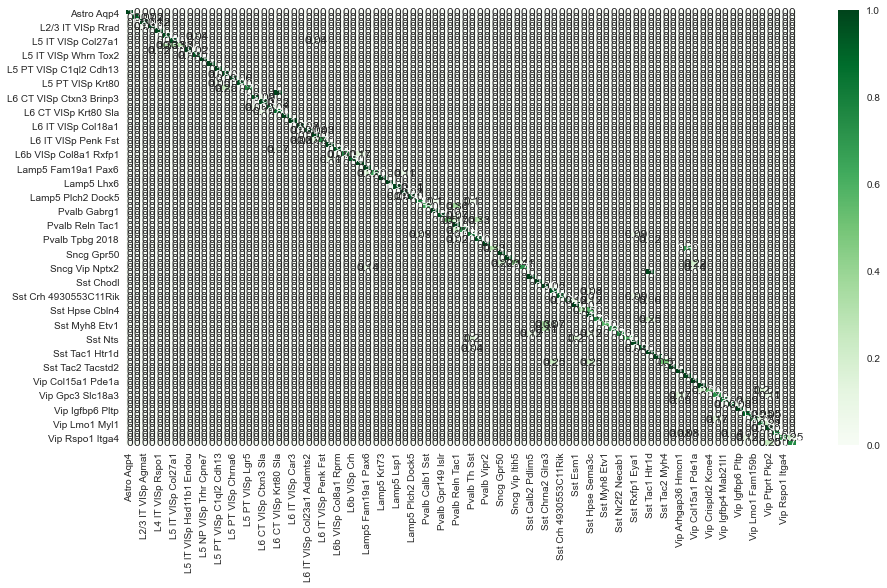

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)